In [1]:
import scanpy as sc
import cytocipher as cc

In [2]:
adata = sc.read("Part4_cell_annotation.h5ad")

In [3]:
adata.obs['cell_annoation'].value_counts()

cell_annoation
MicrovascularEC              7677
EndocardialEC                3991
ArterialEC                   2975
VenousStalksEC               2959
LymphaticEC                  2126
InterferonEC                 1432
ProliferativeEC              1245
ValvularEC                   1242
MuralLikeEC                   579
AorticEC                      510
LymphaticValvularEC           502
VenousPostCapillaryVeinEC     441
FibroblastLikeEC              300
CardiomyocyteLikeEC           277
ImmuneLikeEC                  262
Name: count, dtype: int64

In [4]:
adata = adata.raw.to_adata()

In [5]:
cc.tl.get_markers(adata, 'cell_annoation')
cc.tl.code_enrich(adata, 'cell_annoation')
cc.pl.enrich_heatmap(adata, 'cell_annoation')

Added data.uns['cell_annoation_markers']


/home/lugli/spuccio/anaconda3/envs/scanpy19/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Added data.obsm['cell_annoation_enrich_scores']


/home/lugli/spuccio/anaconda3/envs/scanpy19/lib/python3.10/site-packages/cytocipher/plotting/cluster_diagnostics.py:111: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  score_data = sc.AnnData(cell_scores_df, obs=data.obs)


In [6]:
#adata = adata[(adata[: , 'Cdh5'].X.A > 0) & (adata[: , 'Pecam1'].X.A > 0), :]

In [7]:
sc.set_figure_params(dpi=100)

In [8]:
sc.set_figure_params(scanpy=True, fontsize=12)

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

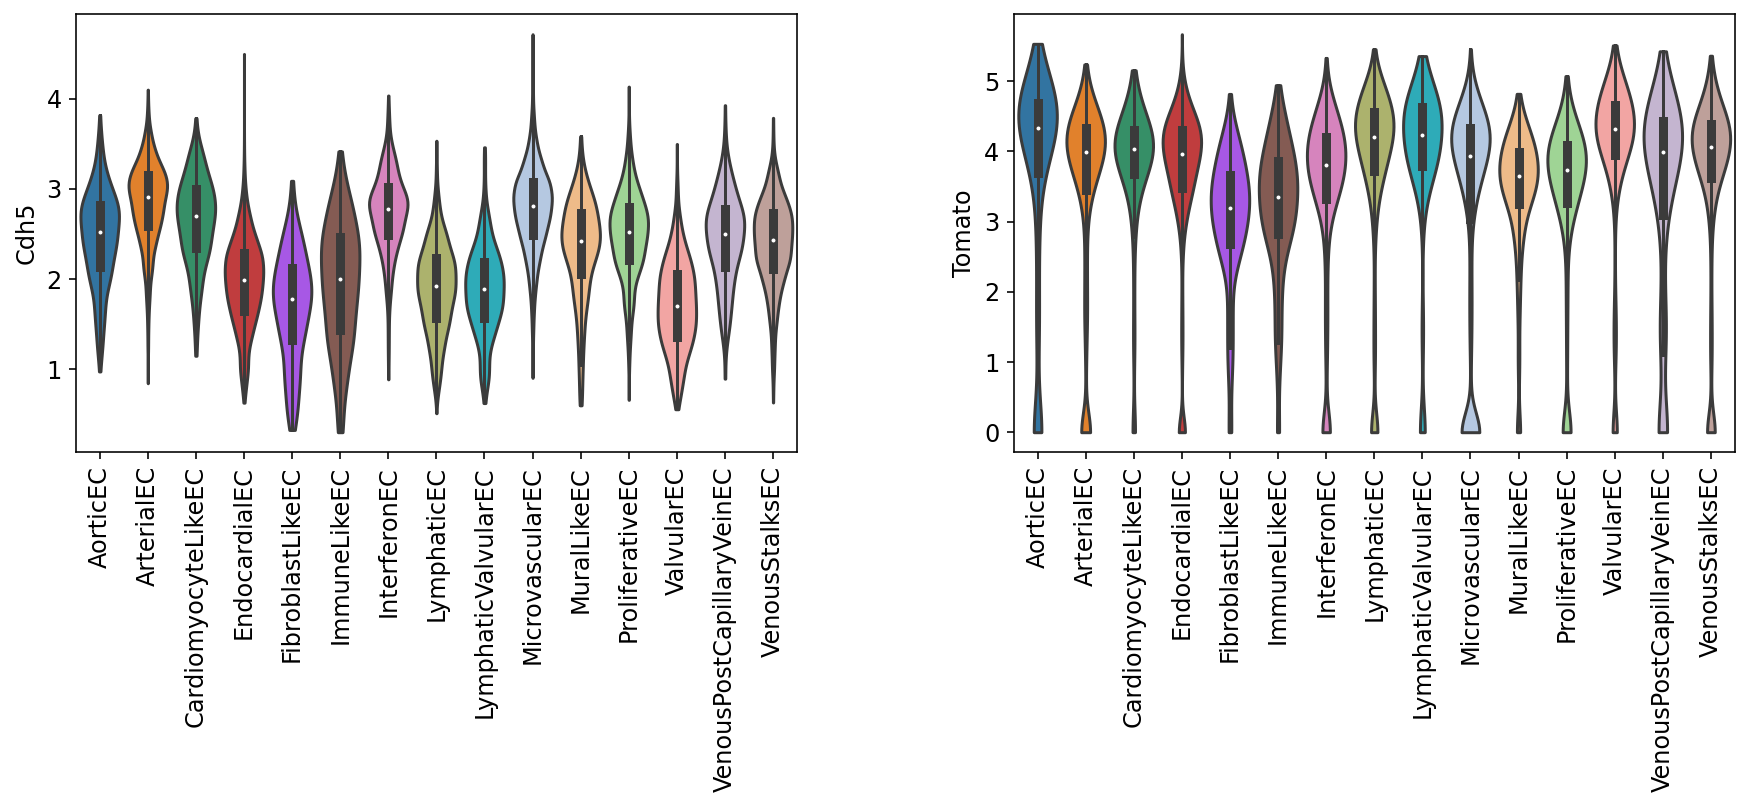

In [10]:
sc.pl.violin(adata, ["Cdh5","Tomato"],
             jitter=1,groupby = 'cell_annoation',use_raw=False,stripplot=False,inner="box",rotation=90,save="Cdh5_Tomato.pdf")

In [16]:
adata.X.A.min()

0.0

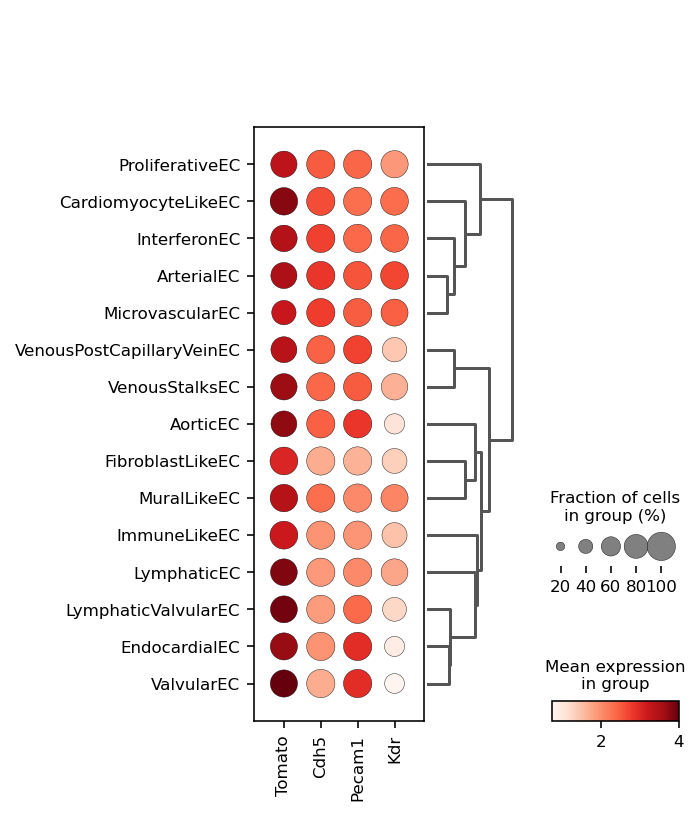

In [12]:
sc.pl.dotplot(adata, ["Tomato","Cdh5","Pecam1","Kdr"], groupby='cell_annoation', dendrogram=True,save="Cdh5_Tomato_dotplot.pdf")

In [13]:
!pwd

/home/lugli/spuccio/Projects/CNR002


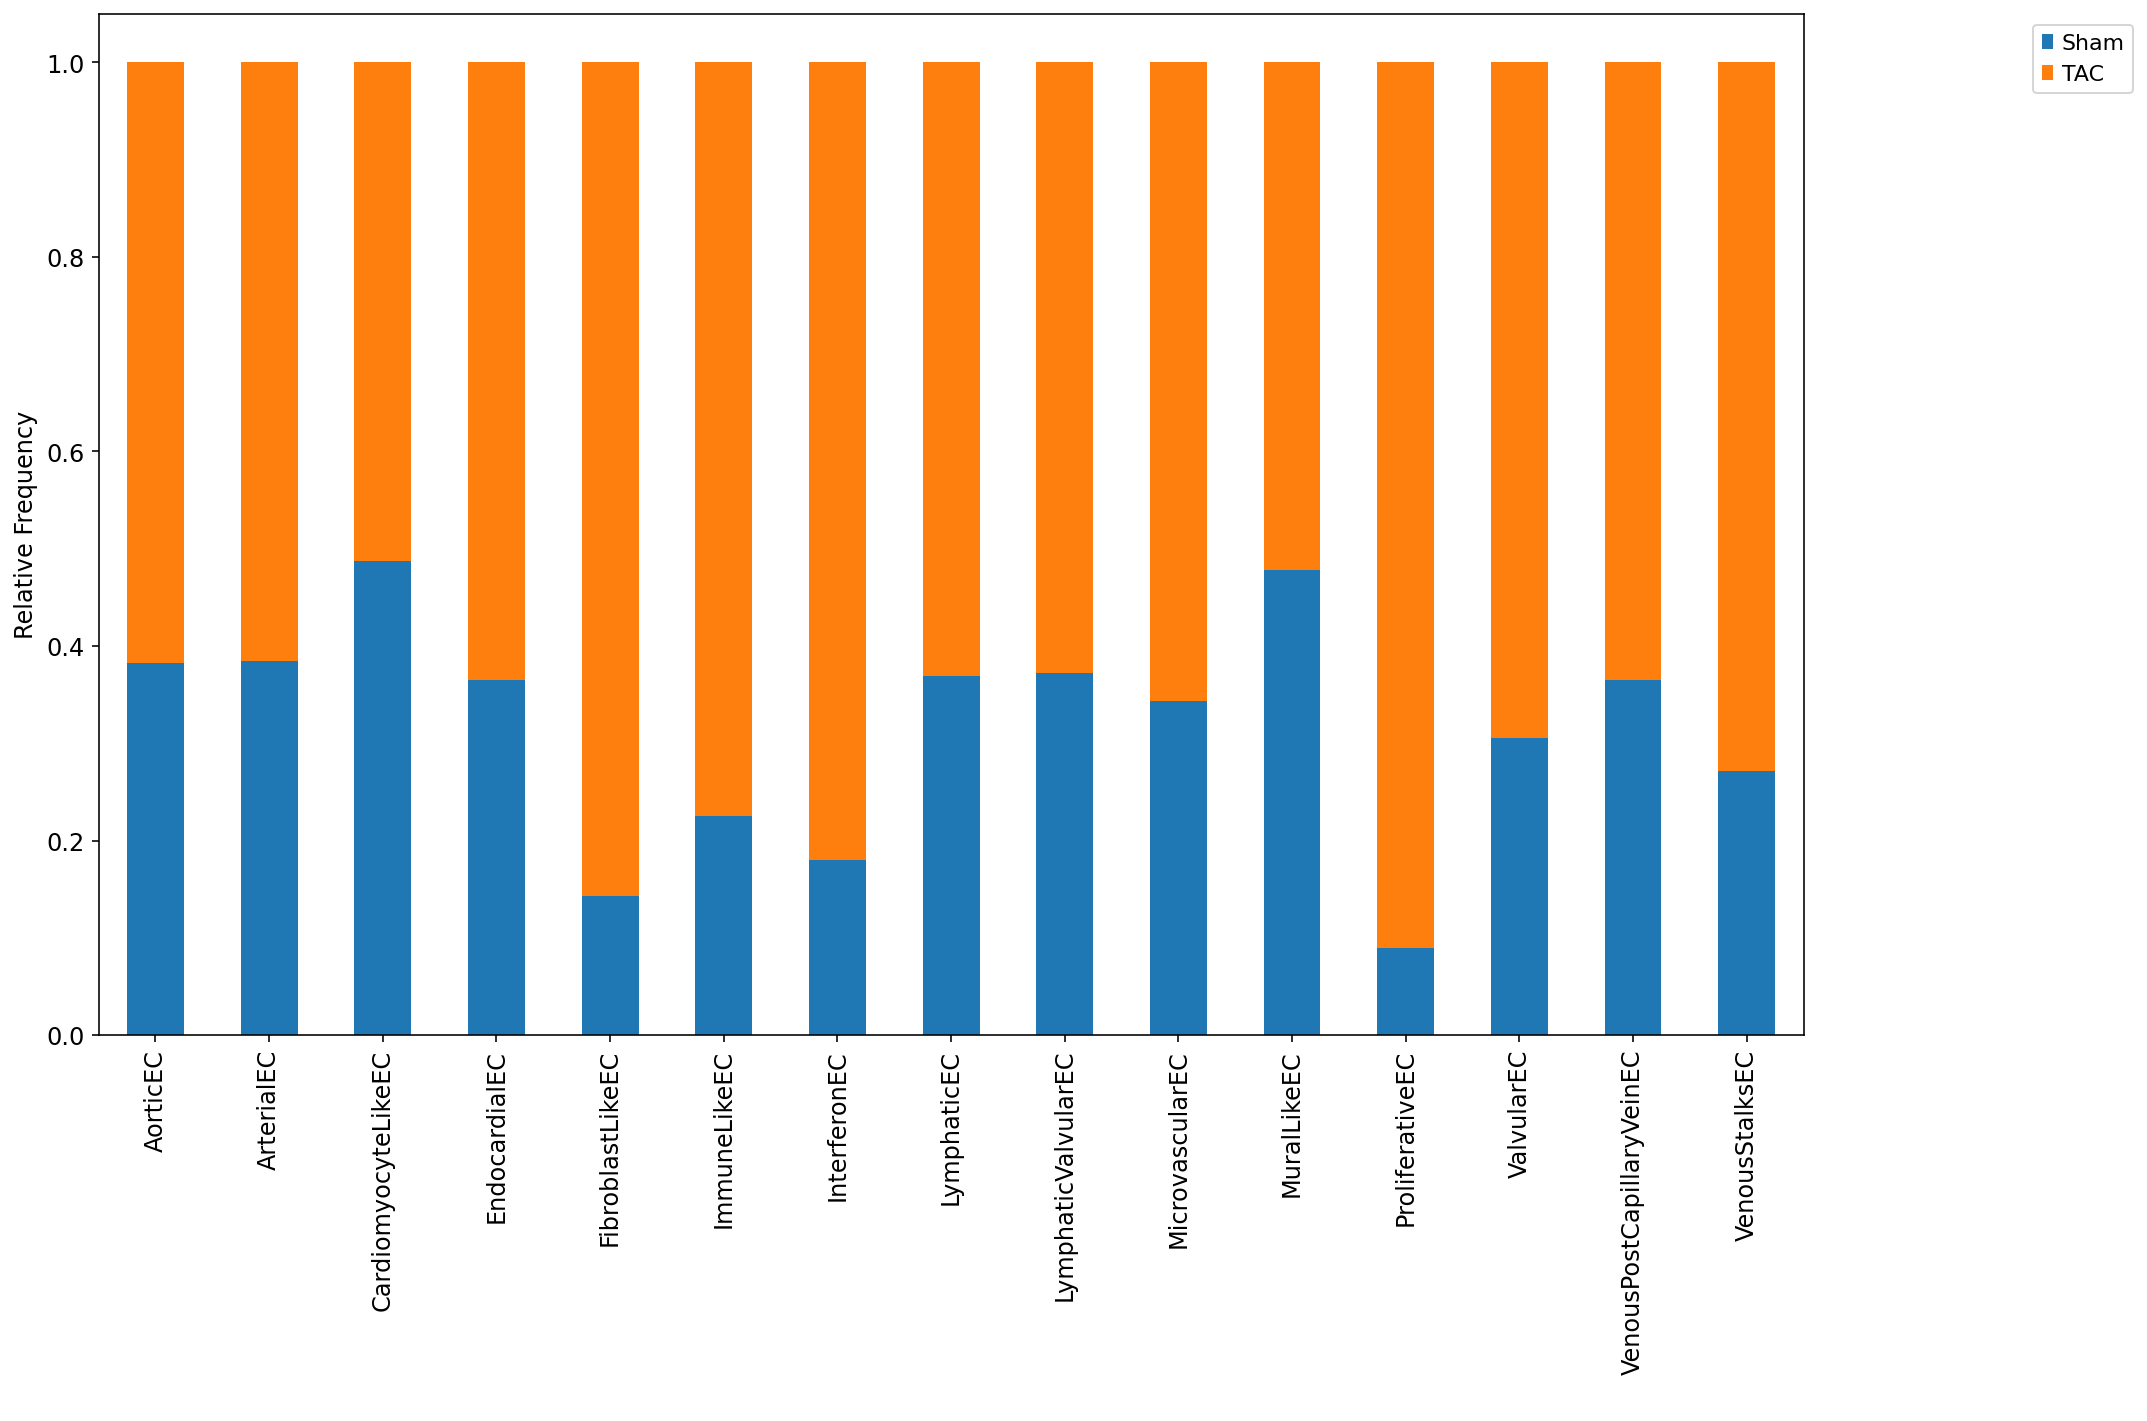

In [59]:
fig, (ax1) = plt.subplots(1, 1,figsize=(15, 10))
ax1 = adata.obs.groupby("cell_annoation")["Model"].value_counts(normalize=True).unstack().plot.bar(stacked=True,legend=False,
                                                                                                       ax=ax1)
ax1.set_xlabel(" ")
ax1.set_ylabel("Relative Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout()
fig.savefig('/home/lugli/spuccio/Projects/CNR002/figures/Relative_Frequency.pdf',format='pdf')

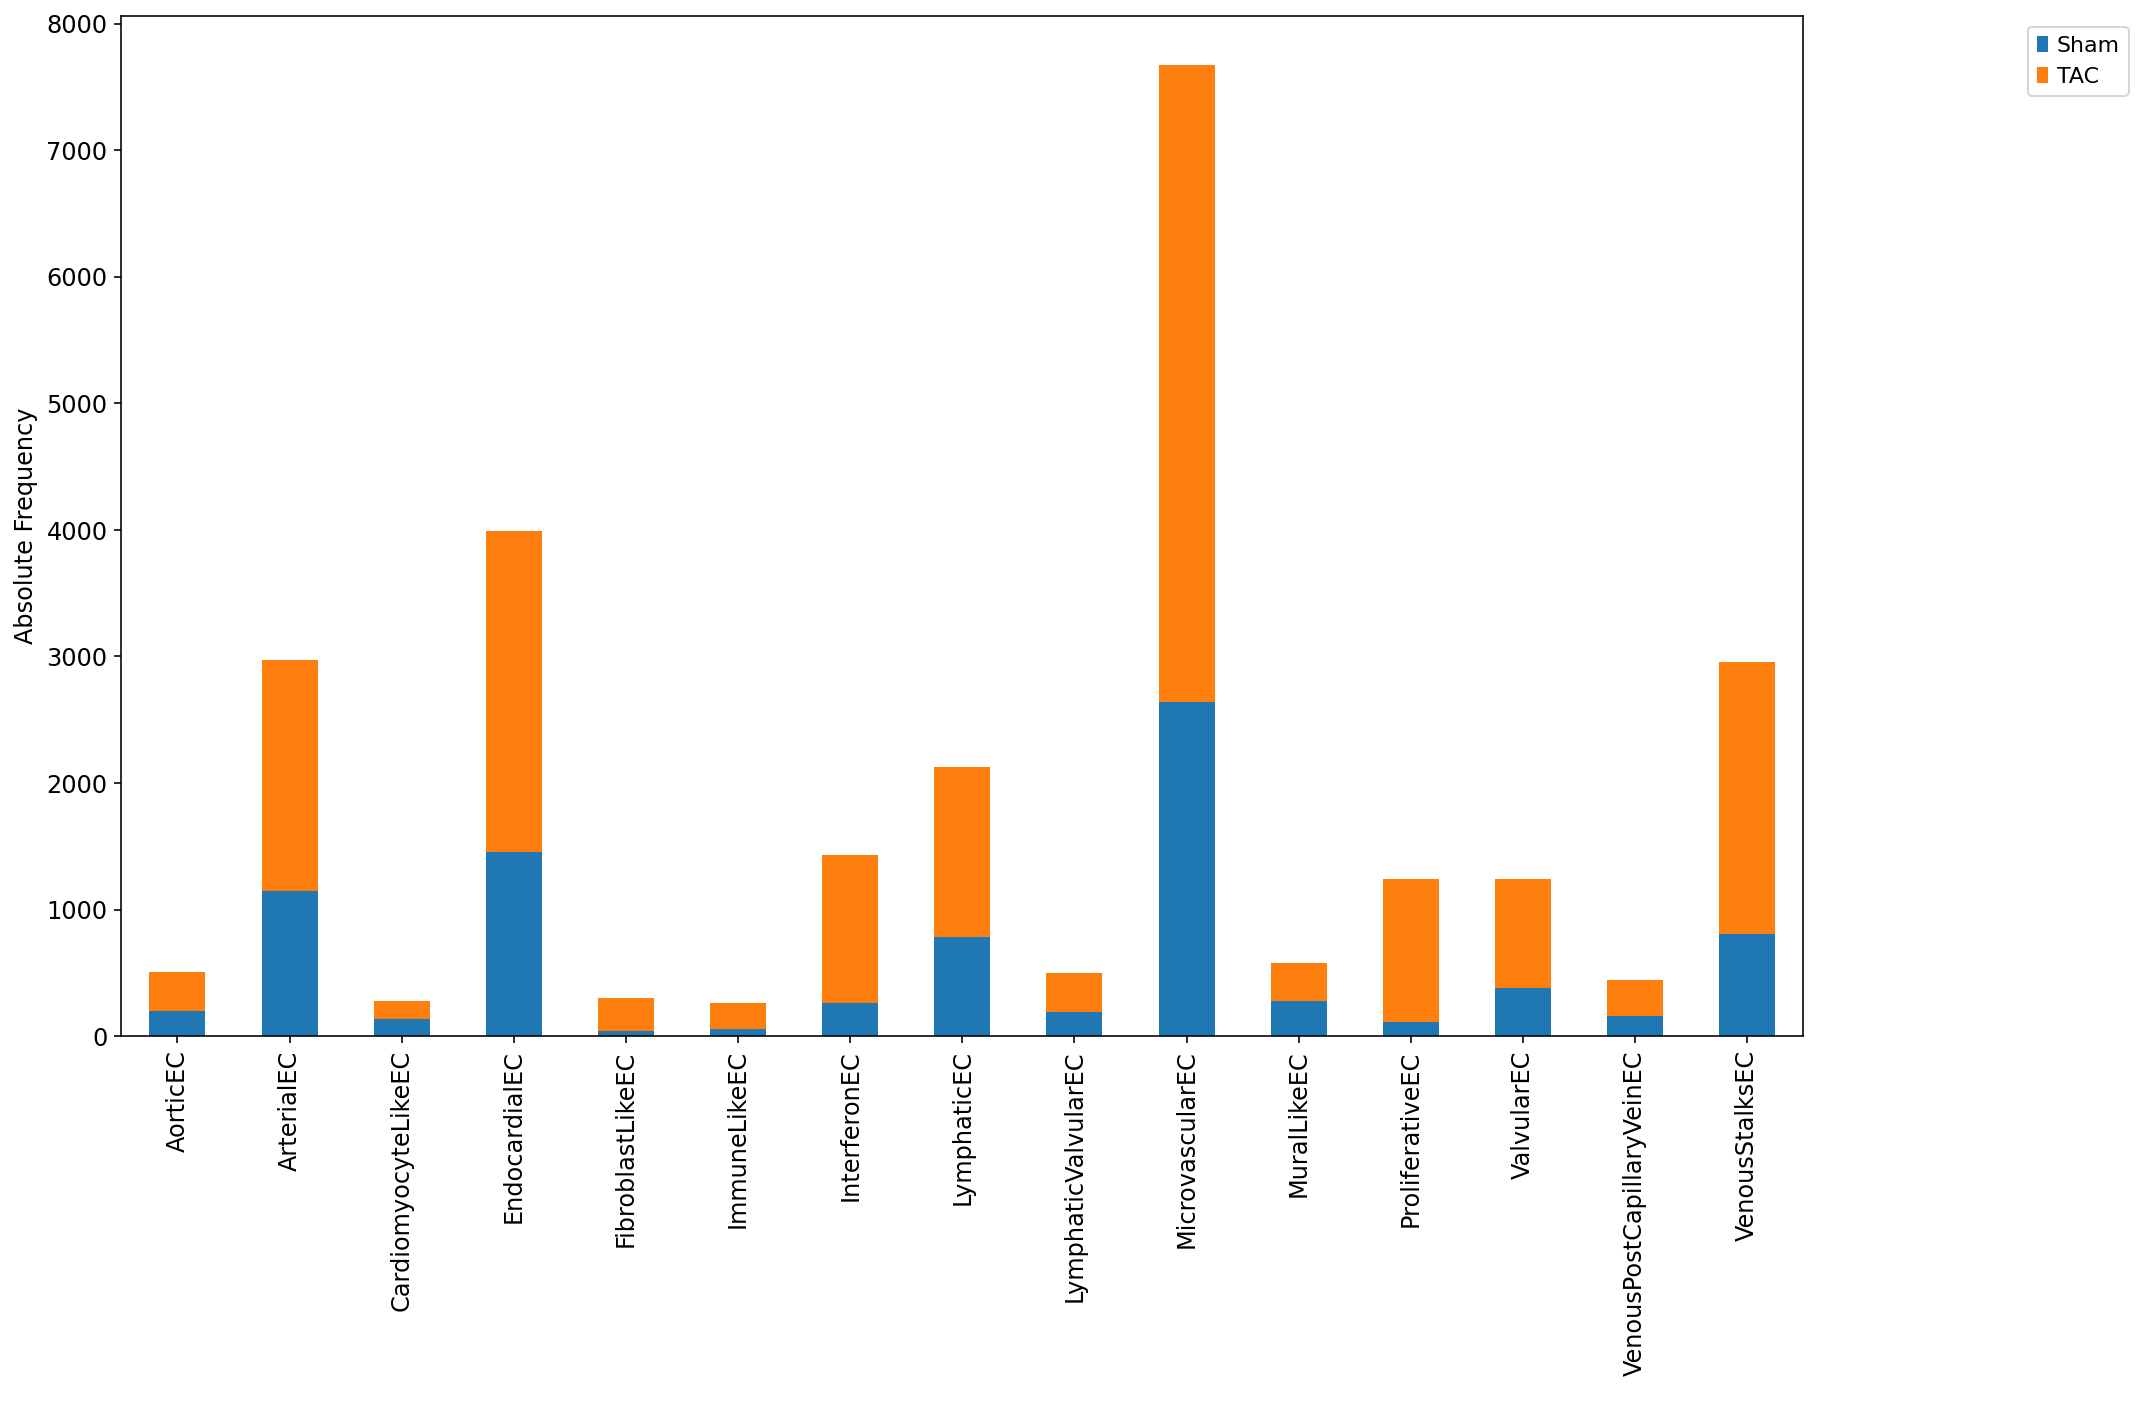

In [61]:
fig, (ax1) = plt.subplots(1, 1,figsize=(15, 10))
ax1 = adata.obs.groupby("cell_annoation")["Model"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,
                                                                                                       ax=ax1)
ax1.set_xlabel(" ")
ax1.set_ylabel("Absolute Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout()
fig.savefig('/home/lugli/spuccio/Projects/CNR002/figures/Absolute_Frequency.pdf',format='pdf')

In [38]:
import seaborn as sns
from statannotations.Annotator import Annotator

In [97]:
import pandas as pd
df = adata.obs.groupby("Sample")["cell_annoation"].value_counts(normalize=True).mul(100)
df.to_csv("./Freq_1.csv",sep="\t",header=True,index=True)
df2 = pd.read_csv("./Freq_1.csv",sep="\t",header=0)

In [98]:
df2 = adata.obs.groupby("Sample")["cell_annoation"].value_counts(normalize=True).reset_index()

In [99]:
df2['Condition'] = df2['Sample'].map({'ShamWT1': 'Sham', 'ShamWT2': 'Sham','ShamWT3': 'Sham','TACWT1': 'TAC','TACWT2': 'TAC','TACWT3': 'TAC'})

In [100]:
adata.obs['cell_annoation'].value_counts()

cell_annoation
MicrovascularEC              7677
EndocardialEC                3991
ArterialEC                   2975
VenousStalksEC               2959
LymphaticEC                  2126
InterferonEC                 1432
ProliferativeEC              1245
ValvularEC                   1242
MuralLikeEC                   579
AorticEC                      510
LymphaticValvularEC           502
VenousPostCapillaryVeinEC     441
FibroblastLikeEC              300
CardiomyocyteLikeEC           277
ImmuneLikeEC                  262
Name: count, dtype: int64

In [101]:
box_pairs=[(('MicrovascularEC', "Sham"), ('MicrovascularEC', "TAC")),
           (('EndocardialEC', "Sham"), ('EndocardialEC', "TAC")),
           (('ArterialEC', "Sham"), ('ArterialEC', "TAC")),
           (('VenousStalksEC', "Sham"), ('VenousStalksEC', "TAC")),
          (('LymphaticEC', "Sham"), ('LymphaticEC', "TAC")),
          (('InterferonEC', "Sham"), ('InterferonEC', "TAC")),
          (('ProliferativeEC', "Sham"), ('ProliferativeEC', "TAC")),
          (('ValvularEC', "Sham"), ('ValvularEC', "TAC")),
          (('MuralLikeEC', "Sham"), ('MuralLikeEC', "TAC")),
          (('AorticEC', "Sham"), ('AorticEC', "TAC")),
          (('LymphaticValvularEC', "Sham"), ('LymphaticValvularEC', "TAC")),
          (('VenousPostCapillaryVeinEC', "Sham"), ('VenousPostCapillaryVeinEC', "TAC")),
          (('FibroblastLikeEC', "Sham"), ('FibroblastLikeEC', "TAC")),
                    (('CardiomyocyteLikeEC', "Sham"), ('CardiomyocyteLikeEC', "TAC")),
          (('ImmuneLikeEC', "Sham"), ('ImmuneLikeEC', "TAC")),]

In [102]:
df2['Sample'].unique()

['ShamWT1', 'ShamWT2', 'ShamWT3', 'TACWT1', 'TACWT2', 'TACWT3']
Categories (6, object): ['ShamWT1', 'ShamWT2', 'ShamWT3', 'TACWT1', 'TACWT2', 'TACWT3']

p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04



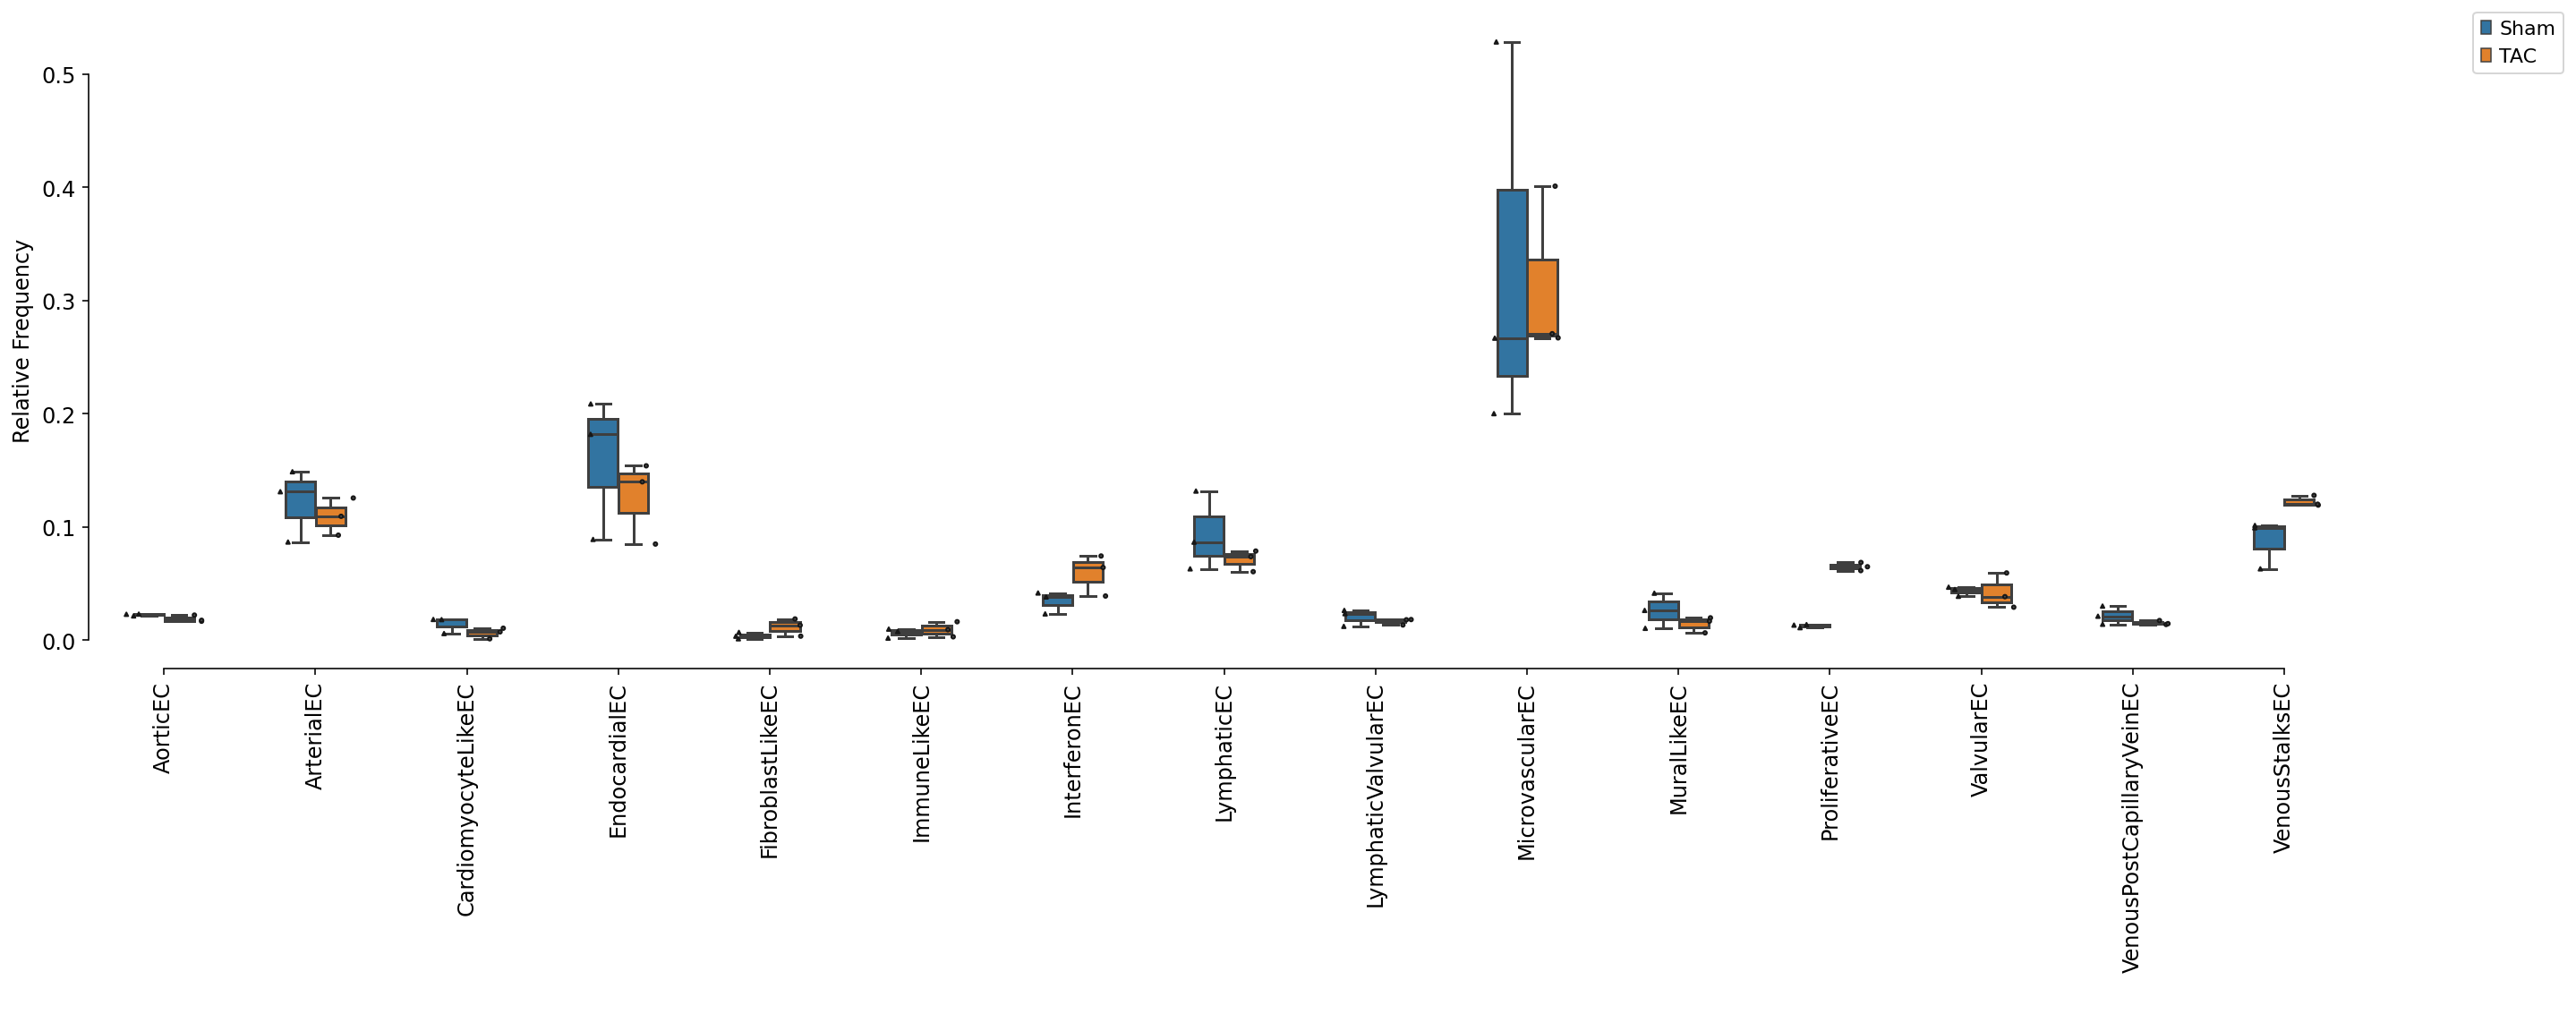

In [103]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df2, x="cell_annoation", y="proportion",hue="Condition",hue_order=['Sham','TAC'],
                 whis=[0, 100], width=.4,dodge=True)

ax = sns.stripplot(x="cell_annoation", y="proportion", data=df2.loc[df2['Condition']=="Sham"],hue="Condition",dodge=True,hue_order=['Sham','TAC'],
              size=2, color=".3", linewidth=1,jitter=0.1,marker="^")

ax = sns.stripplot(x="cell_annoation", y="proportion", data=df2.loc[df2['Condition']=="TAC"],hue="Condition",dodge=True,hue_order=['Sham','TAC'],
              size=2, color=".3", linewidth=1,jitter=0.1,marker='o')

annot = Annotator(ax, box_pairs, data=df2, x="cell_annoation", y="proportion",
               hue="Condition",
               hue_order=['Sham','TAC'])
annot.configure(test='Mann-Whitney', verbose=2,hide_non_significant=True,comparisons_correction=None,
               pvalue_thresholds=[[1e-4, "****"], [1e-3, "***"], [1e-2, "**"], [0.05, "*"]])
annot.apply_test()
annot.annotate()



handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.xaxis.grid(False)
ax.set(ylabel="Relative Frequency")
ax.set(xlabel="Cluster")
ax.set_xlabel(" ")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine(trim=True, left=False)
plt.tight_layout()
plt.savefig('/home/lugli/spuccio/Projects/CNR002/figures/BoxplotFraction.pdf',format='pdf')

In [105]:
adata.write("Part5_Visualization_1.h5ad")